In [395]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
import seaborn as sns
import numpy as np

In [396]:
data=pd.read_csv('C:/Users/m8rqu/Documents/Data BootCamp/Video Games Data/Video Game and Crime Data.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
3,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E


In [490]:
result = data[data['Developer'] == 'Nintendo'].groupby('Developer')['Year_of_Release'].min()
result

Developer
Nintendo   2001-01-01
Name: Year_of_Release, dtype: datetime64[ns]

In [397]:
missing_values_count = data.isna().sum()

print(missing_values_count)

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             2
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       1866
Critic_Count       1866
User_Score           62
User_Count         2388
Developer             0
Rating                0
dtype: int64


In [398]:
data.describe

<bound method NDFrame.describe of                              Name Platform  Year_of_Release     Genre  \
0                      Wii Sports      Wii             2006    Sports   
1                  Mario Kart Wii      Wii             2008    Racing   
2               Wii Sports Resort      Wii             2009    Sports   
3              Kinect Adventures!     X360             2010      Misc   
4       New Super Mario Bros. Wii      Wii             2009  Platform   
...                           ...      ...              ...       ...   
9764                       Ride 2       PC             2016    Racing   
9765  Assassin's Creed Chronicles     XOne             2016    Action   
9766    SÃ©bastien Loeb Rally Evo     XOne             2016    Racing   
9767            Rugby Challenge 3     XOne             2016    Sports   
9768             Fast Racing Neo      WiiU             2016    Action   

                   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0             

In [399]:
# Replace removing (tbd)
data.columns = data.columns.str.strip()
data = data.replace('tbd', '')
data = data.dropna(axis =1, how='all')
count_of_empty = (data == '').all().sum()
print(count_of_empty)

0


In [400]:
missing_values_count = data.isna().sum()

print(missing_values_count)

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             2
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       1866
Critic_Count       1866
User_Score           62
User_Count         2388
Developer             0
Rating                0
dtype: int64


In [401]:
data['Platform'].value_counts()

PS2     1456
DS      1255
X360    1030
Wii      977
PS3      935
PC       758
XB       714
PSP      536
GBA      514
GC       457
PS4      255
3DS      223
PS       204
XOne     186
PSV      150
WiiU     105
DC        14
Name: Platform, dtype: int64

In [402]:
gamers_genre = data.groupby(['Genre'])['Critic_Score']
gamers_genre.mean()

Genre
Action          66.670114
Adventure       64.950331
Fighting        69.190594
Misc            66.680473
Platform        68.124490
Puzzle          67.224771
Racing          67.940111
Role-Playing    72.651099
Shooter         70.268770
Simulation      68.577259
Sports          72.064236
Strategy        72.333333
Name: Critic_Score, dtype: float64

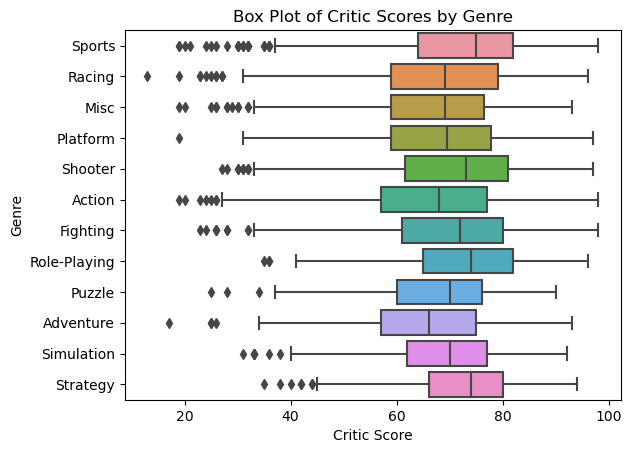

In [403]:
grouped = data.groupby('Genre')['Critic_Score']

# Create a box plot
sns.boxplot(data=data, x='Critic_Score', y='Genre')

# Customize the plot
plt.xlabel('Critic Score')
plt.title('Box Plot of Critic Scores by Genre')

# Show the plot
plt.show()

In [404]:
gamers_genre = data.groupby(['Genre'])['Global_Sales']
genre_profits=gamers_genre.sum()
genre_profits.sort_values(ascending=False)

Genre
Action          1332.97
Sports           980.19
Shooter          844.63
Misc             529.74
Racing           523.38
Role-Playing     512.21
Platform         414.69
Simulation       275.52
Fighting         259.92
Adventure        128.73
Puzzle           112.23
Strategy          80.83
Name: Global_Sales, dtype: float64

In [405]:
game_developer_score =  data.groupby(['Developer'])['Critic_Score'].mean()

game_developer_sales = data.groupby(['Developer'])['Global_Sales'].sum()


In [406]:
# Sort the result in descending order and select the top ten
top_ten_developers = game_developer_score.sort_values(ascending=False).head(20)

# Print the top ten developers
print(top_ten_developers)

Developer
Irrational Games, 2K Marin              96.000000
Kojima Productions, Moby Dick Studio    94.000000
Digital Extremes, 2K Marin              94.000000
Bungie Software                         93.666667
DMA Design, Rockstar North              93.000000
Rockstar North                          92.857143
ThatGameCompany                         92.000000
Irrational Games                        91.500000
Valve Software                          91.384615
Headgate                                91.000000
SCE/WWS, Media Molecule                 91.000000
Bethesda Game Studios                   90.555556
Number None Inc., Knockout Games        90.000000
Lead Pursuit                            90.000000
Retro Studios                           90.000000
2D Boy                                  90.000000
Psygnosis                               90.000000
Yacht Club Games                        89.333333
EA Sports Big                           89.333333
Naughty Dog                             

In [407]:
# Sort the result in descending order and select the top ten
bottom_ten_developers = game_developer_score.sort_values(ascending=True).head(20)

# Print the top ten developers
print(bottom_ten_developers)

Developer
Eutechnyx, Deep Silver                               16.000000
Data Design Interactive                              19.333333
Pronto Games                                         23.000000
Phosphor Games Studio, LLC                           24.000000
Wildfire Studios                                     26.000000
Osiris Studios                                       26.000000
Humagade                                             26.000000
Gameness Art Software                                26.000000
TDK Mediactive                                       27.000000
SingleTrac                                           27.000000
Prolific                                             27.000000
Mid Carolina Media                                   28.000000
FrontLine Studios                                    28.000000
Atomic Planet Entertainment, Mud Duck Productions    30.000000
Gameinvest, Seed Studios, Lda                        31.000000
Digital Leisure Inc.                         

In [408]:
# Filter the data for the top twenty developers
top_developers_sales = data[data['Developer'].isin(top_ten_developers.index)]

# Group the filtered data by 'Developer' and calculate the total 'Global_Sales'
developer_sales = top_developers_sales.groupby('Developer')['Global_Sales'].sum()
developer_sales.sort_values(ascending=False)

Developer
Rockstar North                          119.47
Naughty Dog                              45.39
Bethesda Game Studios                    41.60
Valve Software                           19.14
Bungie Software                          15.61
Retro Studios                            14.51
SCE/WWS, Media Molecule                   8.36
Kojima Productions, Moby Dick Studio      4.98
Irrational Games                          4.31
Irrational Games, 2K Marin                3.24
EA Sports Big                             2.63
Digital Extremes, 2K Marin                1.42
Psygnosis                                 0.76
Yacht Club Games                          0.32
ThatGameCompany                           0.21
2D Boy                                    0.04
Number None Inc., Knockout Games          0.03
Lead Pursuit                              0.02
Headgate                                  0.01
DMA Design, Rockstar North                0.01
Name: Global_Sales, dtype: float64

In [409]:
nintendo_platform = data[data['Developer'] == 'Nintendo'].groupby(['Platform'])['Critic_Score'].median()
nintendo_platform

Platform
3DS     78.0
DS      84.0
GBA     77.0
GC      87.0
Wii     80.0
WiiU    82.5
Name: Critic_Score, dtype: float64

In [410]:
nintendo_platform = data[data['Developer'] == 'Nintendo'].groupby(['Platform'])['Global_Sales'].median()
nintendo_platform

Platform
3DS      3.050
DS       5.080
GBA      0.785
GC       1.590
Wii     11.350
WiiU     3.765
Name: Global_Sales, dtype: float64

In [411]:
nintendo_platform_sales = data.groupby(['Platform'])['Global_Sales'].sum()
nintendo_platform_sales.sort_values(ascending=False)

Platform
PS2     1044.11
X360     900.46
PS3      837.19
Wii      795.28
DS       559.25
PS4      245.99
PS       234.41
XB       228.25
PSP      212.29
PC       204.47
GBA      188.79
GC       171.56
XOne     134.20
3DS      131.98
WiiU      67.57
PSV       34.69
DC         4.55
Name: Global_Sales, dtype: float64

In [412]:
rating = data.groupby(['Rating'])['Global_Sales'].sum()
rating.sort_values(ascending=False)

Rating
E       2408.67
T       1474.13
M       1462.95
E10+     641.20
K-A        4.33
AO         1.95
EC         1.78
RP         0.03
Name: Global_Sales, dtype: float64

In [413]:
data[data['Developer'] == 'Nintendo'].groupby(['Rating'])['Global_Sales'].sum()

Rating
E       495.94
E10+     21.29
T        14.48
Name: Global_Sales, dtype: float64

In [414]:
sales_developer = data.groupby(['Developer'])['Global_Sales'].sum()
sales_developer.sort_values(ascending=False).head(25)

Developer
Nintendo                   531.71
EA Sports                  172.22
EA Canada                  138.17
Ubisoft                    131.96
Rockstar North             119.47
Capcom                     115.34
Ubisoft Montreal           107.50
Treyarch                   101.53
EA Tiburon                  88.75
Infinity Ward               77.62
Visual Concepts             72.75
Konami                      71.71
Traveller's Tales           67.32
Electronic Arts             65.52
Polyphony Digital           65.20
Namco                       61.05
Neversoft Entertainment     61.00
Vicarious Visions           56.37
SquareSoft                  54.65
EA DICE                     51.01
Square Enix                 49.65
Yuke's                      47.50
Naughty Dog                 45.39
Bethesda Game Studios       41.60
Blizzard Entertainment      40.75
Name: Global_Sales, dtype: float64

In [415]:
data[data['Publisher'] == 'Nintendo'].groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)

Genre
Sports          179.51
Platform        169.86
Misc            132.97
Racing           91.67
Role-Playing     71.10
Action           60.73
Puzzle           49.65
Simulation       38.97
Fighting         21.82
Shooter          19.63
Adventure        12.35
Strategy          8.98
Name: Global_Sales, dtype: float64

In [416]:
nintendo_games = data[(data['Publisher'] == 'Nintendo')] 
nintendo_games.sort_values('Critic_Score',ascending = False).head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
235,Metroid Prime,GC,2002,Shooter,Nintendo,1.96,0.67,0.10,0.09,2.82,97.0,70.0,9.3,747.0,Retro Studios,T
27,Super Mario Galaxy,Wii,2007,Platform,Nintendo,6.06,3.35,1.20,0.74,11.35,97.0,73.0,8.9,2147.0,Nintendo,E
68,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,97.0,87.0,9.1,1854.0,Nintendo EAD Tokyo,E
516,The Legend of Zelda: Twilight Princess,GC,2006,Action,Nintendo,1.15,0.36,0.04,0.04,1.59,96.0,16.0,9.2,568.0,Nintendo,T
131,The Legend of Zelda: The Wind Waker,GC,2002,Action,Nintendo,2.60,0.99,0.89,0.13,4.60,96.0,80.0,8.9,968.0,Nintendo,E


In [417]:
nintendo_racing_games = data[(data['Publisher'] == 'Nintendo') & (data['Genre'] == 'Racing')]
nintendo_racing_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
7,Mario Kart DS,DS,2005,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
34,Mario Kart 7,3DS,2011,Racing,Nintendo,5.03,4.02,2.69,0.91,12.66,85.0,73.0,8.2,632.0,"Retro Studios, Entertainment Analysis & Develo...",E
85,Mario Kart 8,WiiU,2014,Racing,Nintendo,3.15,2.15,1.28,0.51,7.09,88.0,82.0,9.1,1599.0,Nintendo,E
129,Mario Kart: Super Circuit,GBA,2001,Racing,Nintendo,2.62,1.64,0.99,0.23,5.47,93.0,24.0,8.3,108.0,Intelligent Systems,E


In [418]:
top_nintendo = nintendo_racing_games.sort_values('Critic_Score', ascending=False)
top_nintendo.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
129,Mario Kart: Super Circuit,GBA,2001,Racing,Nintendo,2.62,1.64,0.99,0.23,5.47,93.0,24.0,8.3,108.0,Intelligent Systems,E
7,Mario Kart DS,DS,2005,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
1825,F-Zero GX,GC,2003,Racing,Nintendo,0.41,0.11,0.12,0.02,0.65,89.0,50.0,8.5,161.0,Amusement Vision,T
85,Mario Kart 8,WiiU,2014,Racing,Nintendo,3.15,2.15,1.28,0.51,7.09,88.0,82.0,9.1,1599.0,Nintendo,E
1920,F-Zero: Maximum Velocity,GBA,2001,Racing,Nintendo,0.39,0.16,0.37,0.12,1.04,86.0,19.0,8.5,22.0,Nd Cube,E
34,Mario Kart 7,3DS,2011,Racing,Nintendo,5.03,4.02,2.69,0.91,12.66,85.0,73.0,8.2,632.0,"Retro Studios, Entertainment Analysis & Develo...",E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
1873,Wave Race: Blue Storm,GC,2001,Racing,Nintendo,0.40,0.10,0.09,0.02,0.60,80.0,21.0,8.3,29.0,Nintendo,E
3026,ExciteBots: Trick Racing,Wii,2009,Racing,Nintendo,0.24,0.00,0.00,0.02,0.26,77.0,29.0,8.6,26.0,Monster Games Inc.,E
5047,F-Zero: GP Legend,GBA,2003,Racing,Nintendo,0.11,0.04,0.00,0.00,0.16,77.0,31.0,8.5,18.0,Suzak,E


In [419]:
top_nintendo = nintendo_racing_games.sort_values('Global_Sales', ascending=False)
top_nintendo.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
7,Mario Kart DS,DS,2005,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
34,Mario Kart 7,3DS,2011,Racing,Nintendo,5.03,4.02,2.69,0.91,12.66,85.0,73.0,8.2,632.0,"Retro Studios, Entertainment Analysis & Develo...",E
85,Mario Kart 8,WiiU,2014,Racing,Nintendo,3.15,2.15,1.28,0.51,7.09,88.0,82.0,9.1,1599.0,Nintendo,E
129,Mario Kart: Super Circuit,GBA,2001,Racing,Nintendo,2.62,1.64,0.99,0.23,5.47,93.0,24.0,8.3,108.0,Intelligent Systems,E
614,Kirby Air Ride,GC,2003,Racing,Nintendo,1.01,0.11,0.45,0.04,1.62,61.0,28.0,7.9,69.0,HAL Labs,E
549,Diddy Kong Racing DS,DS,2007,Racing,Nintendo,1.09,0.03,0.00,0.09,1.22,63.0,39.0,7.5,27.0,Rare Ltd.,E
1920,F-Zero: Maximum Velocity,GBA,2001,Racing,Nintendo,0.39,0.16,0.37,0.12,1.04,86.0,19.0,8.5,22.0,Nd Cube,E
3292,Pokemon Dash,DS,2004,Racing,Nintendo,0.21,0.14,0.38,0.04,0.77,46.0,28.0,5.9,34.0,Ambrella,E
1825,F-Zero GX,GC,2003,Racing,Nintendo,0.41,0.11,0.12,0.02,0.65,89.0,50.0,8.5,161.0,Amusement Vision,T


In [420]:
square_enix = data[(data['Publisher'] == 'Square Enix')]
square_enix.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
180,Kingdom Hearts II,PS2,2005,Role-Playing,Square Enix,2.20,0.58,1.38,0.17,4.33,87.0,64.0,9,766.0,Square Enix,E10+
257,Final Fantasy XII,PS2,2006,Role-Playing,Square Enix,1.88,0.00,2.33,1.74,5.95,92.0,64.0,7.6,972.0,Square Enix,T
294,Final Fantasy XIII,PS3,2009,Role-Playing,Square Enix,1.74,1.21,1.87,0.51,5.33,83.0,83.0,7.3,2483.0,Square Enix,T
419,Crisis Core: Final Fantasy VII,PSP,2007,Role-Playing,Square Enix,1.35,0.59,0.80,0.43,3.18,83.0,67.0,8,463.0,Square Enix,T
446,Final Fantasy XIII,X360,2010,Role-Playing,Square Enix,1.28,0.67,0.01,0.21,2.16,82.0,54.0,6.3,539.0,Square Enix,T


In [421]:
square_enix.sort_values("Global_Sales", ascending= False).head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
257,Final Fantasy XII,PS2,2006,Role-Playing,Square Enix,1.88,0.00,2.33,1.74,5.95,92.0,64.0,7.6,972.0,Square Enix,T
294,Final Fantasy XIII,PS3,2009,Role-Playing,Square Enix,1.74,1.21,1.87,0.51,5.33,83.0,83.0,7.3,2483.0,Square Enix,T
1085,Dragon Quest VIII: Journey of the Cursed King,PS2,2004,Role-Playing,Square Enix,0.65,0.75,3.61,0.20,5.21,89.0,63.0,8.8,245.0,Level 5,T
180,Kingdom Hearts II,PS2,2005,Role-Playing,Square Enix,2.20,0.58,1.38,0.17,4.33,87.0,64.0,9,766.0,Square Enix,E10+
419,Crisis Core: Final Fantasy VII,PSP,2007,Role-Playing,Square Enix,1.35,0.59,0.80,0.43,3.18,83.0,67.0,8,463.0,Square Enix,T
887,Final Fantasy XIII-2,PS3,2011,Role-Playing,Square Enix,0.78,0.73,0.89,0.23,2.63,79.0,53.0,6.6,707.0,Square Enix,T
1432,Dissidia: Final Fantasy,PSP,2008,Fighting,Square Enix,0.51,0.50,0.91,0.31,2.23,79.0,61.0,8,139.0,Square Enix,T
446,Final Fantasy XIII,X360,2010,Role-Playing,Square Enix,1.28,0.67,0.01,0.21,2.16,82.0,54.0,6.3,539.0,Square Enix,T
1233,Hitman: Absolution,PS3,2012,Action,Square Enix,0.59,1.05,0.07,0.44,2.14,83.0,30.0,7.5,511.0,Io Interactive,M
737,Final Fantasy III,DS,2006,Role-Playing,Square Enix,0.89,0.04,1.07,0.09,2.08,77.0,45.0,7.1,136.0,Matrix Software,E10+


In [422]:
score = data[['Year_of_Release','Critic_Score']]
score.dropna()

,Year_of_Release,Critic_Score
0,2006,76.0
1,2008,82.0
2,2009,80.0
3,2010,61.0
4,2009,87.0
...,...,...
9761,2016,53.0
9762,2016,79.0
9764,2016,78.0
9766,2016,63.0


In [423]:
missing_values_count = score.isna().sum()

print(missing_values_count)

Year_of_Release       0
Critic_Score       1866
dtype: int64


In [424]:
score.dropna(subset=['Critic_Score'], inplace=True)

C:\Users\m8rqu\AppData\Local\Temp\ipykernel_26448\2197016215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score.dropna(subset=['Critic_Score'], inplace=True)


In [425]:
score

,Year_of_Release,Critic_Score
0,2006,76.0
1,2008,82.0
2,2009,80.0
3,2010,61.0
4,2009,87.0
...,...,...
9761,2016,53.0
9762,2016,79.0
9764,2016,78.0
9766,2016,63.0


In [426]:
missing_values_count = score.isna().sum()

print(missing_values_count)

Year_of_Release    0
Critic_Score       0
dtype: int64


In [427]:

# To prepare for time series we index the date
# op_va_df['TRANSACTION_DATE'] = pd.to_datetime(op_va_df['TRANSACTION_DATE'])
# op_va_df.set_index('TRANSACTION_DATE', inplace=True)
# Resample to monthly data and calculate the mean
# yearly_mean = data.resample('Y').mean()
# yearly_mean['Critic_Score'].plot(figsize=(15,6))

score['Year_of_Release'] = pd.to_datetime(score['Year_of_Release'], format='%Y')

# Set 'Year_of_Release' as the index
score.set_index('Year_of_Release', inplace=True)

C:\Users\m8rqu\AppData\Local\Temp\ipykernel_26448\3914827964.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['Year_of_Release'] = pd.to_datetime(score['Year_of_Release'], format='%Y')


<AxesSubplot:xlabel='Year_of_Release'>

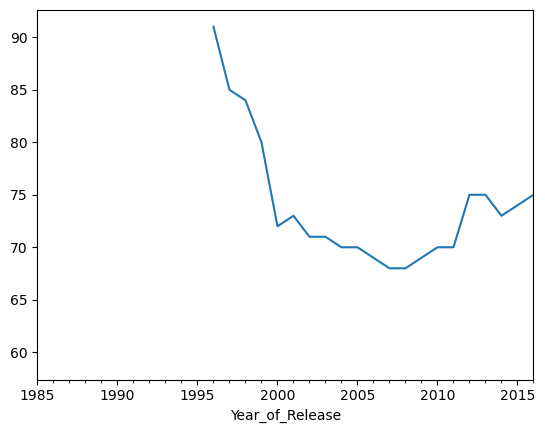

In [428]:
# Now you can use resample with a DatetimeIndex
yearly_mean = score.resample('Y').median()
yearly_mean['Critic_Score'].plot()

In [429]:
# Convert the 'Year_of_Release' column to datetime format
data['Year_of_Release'] = pd.to_datetime(data['Year_of_Release'], format='%Y')

# Group the data by year and count the unique number of developers per year
developers_per_year = data.groupby(data['Year_of_Release'].dt.year)['Developer'].nunique()

developers_per_year

Year_of_Release
1985      1
1988      1
1992      2
1994      1
1996      6
1997     18
1998     27
1999     35
2000    104
2001    211
2002    309
2003    294
2004    265
2005    323
2006    326
2007    398
2008    432
2009    438
2010    359
2011    310
2012    171
2013    134
2014    128
2015    129
2016    123
Name: Developer, dtype: int64

In [430]:
score_per_year = data.groupby(data['Year_of_Release'].dt.year)['Critic_Score'].median()


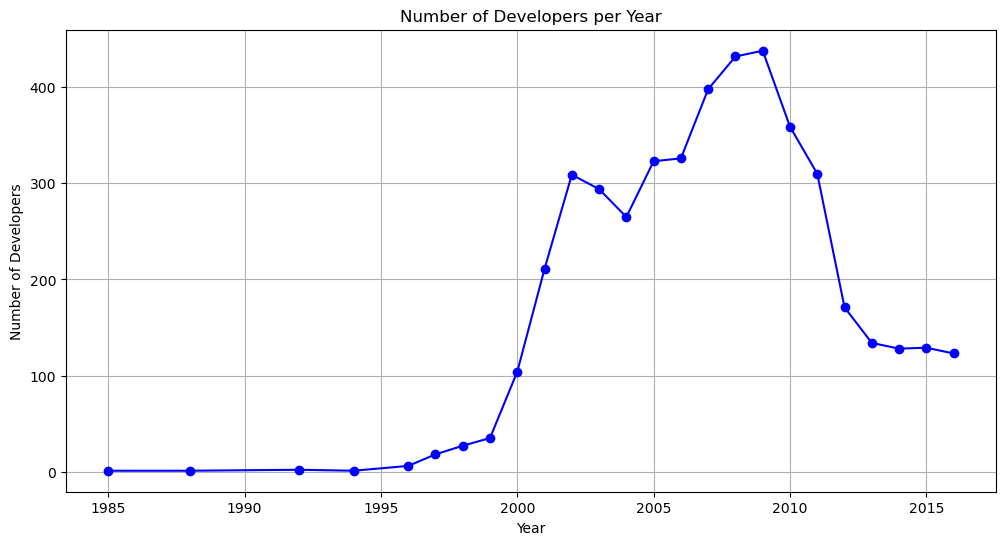

In [431]:
# Create a line plot
plt.figure(figsize=(12, 6))  # Optional: Set the figure size
developers_per_year.plot(kind='line', marker='o', linestyle='-', color='b')
# score_per_year.plot(kind='line', marker = '*', linestyle = '-', color = 'red')
# Customize the plot
plt.title('Number of Developers per Year')
plt.xlabel('Year')
plt.ylabel('Number of Developers')
plt.grid(True)

# Show the plot
plt.show()

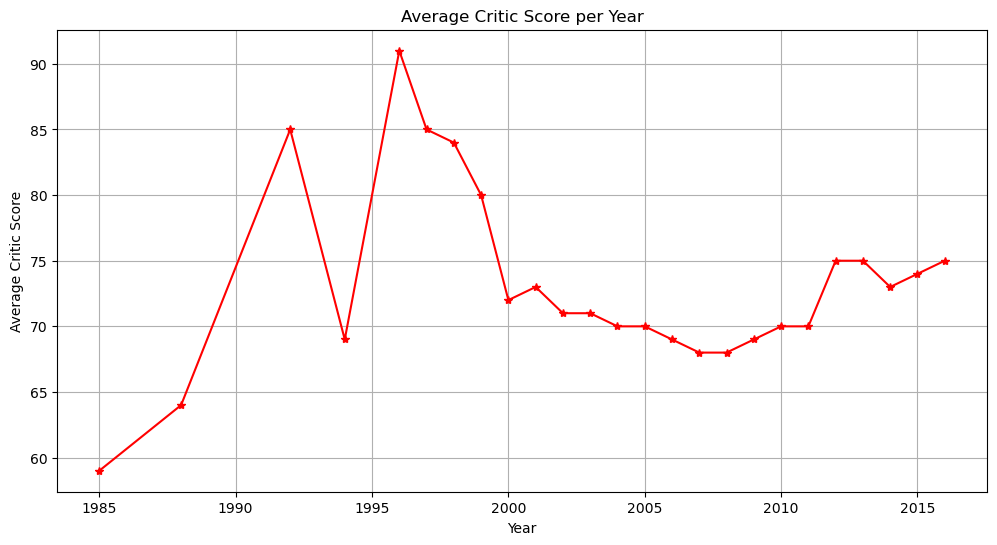

In [432]:
# Create a line plot
plt.figure(figsize=(12, 6))  # Optional: Set the figure size
score_per_year.plot(kind='line', marker = '*', linestyle = '-', color = 'red')
# Customize the plot
plt.title('Average Critic Score per Year')
plt.xlabel('Year')
plt.ylabel('Average Critic Score')
plt.grid(True)

# Show the plot
plt.show()

The correlation is: -0.44


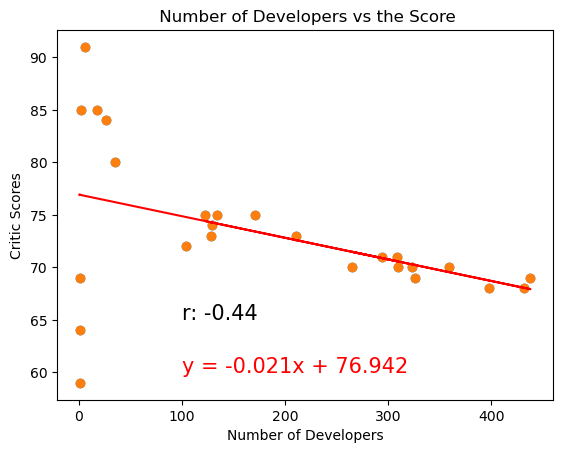

In [433]:
import scipy.stats as st
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Plot out correlation
x_values = developers_per_year
y_values = score_per_year
plt.scatter(x_values,y_values)
plt.title(" Number of Developers vs the Score")
plt.xlabel('Number of Developers')
plt.ylabel('Critic Scores')

# Print out the r-squared value along with the plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,60),fontsize=15,color="red")

rvalue_rounded = round(rvalue, 2)
plt.annotate(f"r: {rvalue_rounded}",(100,65),fontsize=15, color = "black")
print(f"The correlation is: {rvalue_rounded}")
plt.show()

(array([1., 1., 2., 9., 4., 3., 1., 1., 2., 1.]),
 array([59. , 62.2, 65.4, 68.6, 71.8, 75. , 78.2, 81.4, 84.6, 87.8, 91. ]),
 <BarContainer object of 10 artists>)

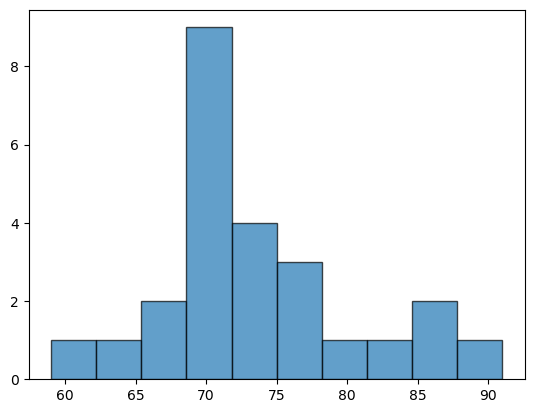

In [434]:
plt.hist(score_per_year, bins=10, edgecolor='k', alpha=0.7)

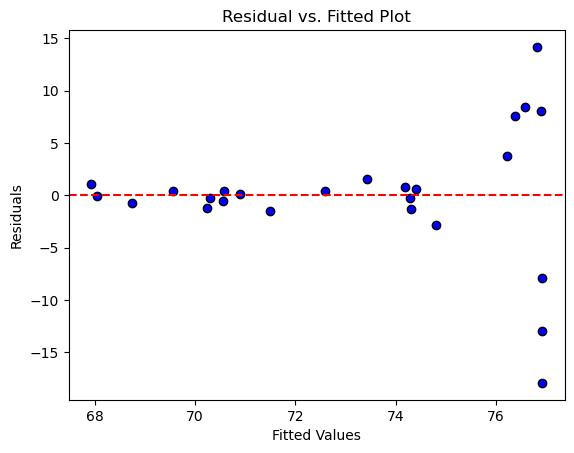

In [435]:
# Sample data
from sklearn.linear_model import LinearRegression

X = developers_per_year.values.reshape(-1, 1)
y = score_per_year.values

#Transforming the dataset
X_trans = X

# Fit a linear regression model
reg = LinearRegression()
reg.fit(X_trans, y)

# Calculate residuals
residuals = y - reg.predict(X_trans)

# Create a residual vs. fitted plot
plt.scatter(reg.predict(X_trans), residuals, c='b', marker='o', edgecolors='k')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

(array([8., 0., 4., 2., 1., 0., 2., 4., 1., 3.]),
 array([  1. ,  44.7,  88.4, 132.1, 175.8, 219.5, 263.2, 306.9, 350.6,
        394.3, 438. ]),
 <BarContainer object of 10 artists>)

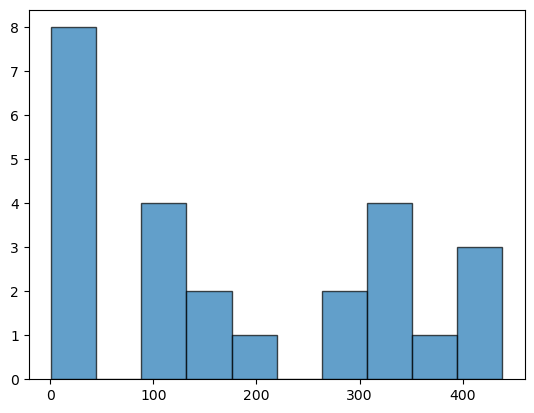

In [436]:
plt.hist(X, bins=10, edgecolor='k', alpha=0.7)

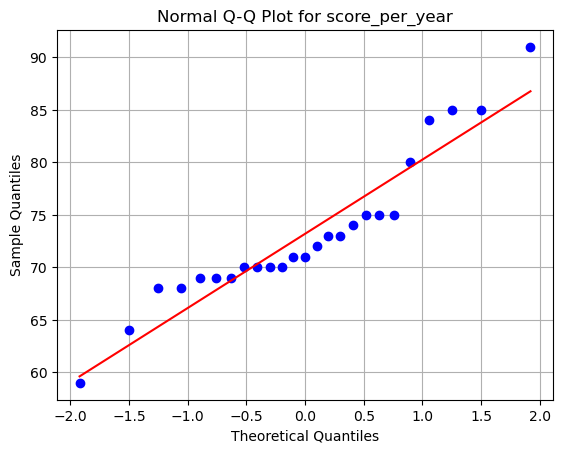

In [437]:
from scipy import stats
# Create a Normal Q-Q plot for your dataset
res = stats.probplot(score_per_year, plot=plt, dist='norm')

# Add a reference line for a perfect normal distribution
plt.title('Normal Q-Q Plot for score_per_year')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)

# Show the plot
plt.show()

In [438]:
statistic, p_value = stats.shapiro(X)
print(f"Shapiro-Wilk Test - Statistic: {statistic}, p-value: {p_value}")

Shapiro-Wilk Test - Statistic: 0.8987613916397095, p-value: 0.017243370413780212


In [463]:
# Convert the 'Year_of_Release' column to datetime format
data['Year_of_Release'] = pd.to_datetime(data['Year_of_Release'], format='%Y')

# Group the data by year and count the unique number of developers per year
developers_per_year = data.groupby(data['Year_of_Release'].dt.year)['Developer'].nunique()

developers_per_year

Year_of_Release
1985      1
1988      1
1992      2
1994      1
1996      6
1997     18
1998     27
1999     35
2000    104
2001    211
2002    309
2003    294
2004    265
2005    323
2006    326
2007    398
2008    432
2009    438
2010    359
2011    310
2012    171
2013    134
2014    128
2015    129
2016    123
Name: Developer, dtype: int64

In [493]:
# Extract the year from the 'Year_of_Release' column
data['Year'] = data['Year_of_Release'].dt.year

# Filter the dataset to include only rows where the 'Year' is within the range 1998 to 2015
filtered_df = data[(data['Year'] >= 2001) & (data['Year'] <= 2015)]

# Get the list of developers in 1998
developers_1998 = set(filtered_df[filtered_df['Year'] == 2003]['Developer'])

# Get the list of developers in 2015
developers_2015 = set(filtered_df[filtered_df['Year'] == 2015]['Developer'])

# Find common developers
common_developers = developers_1998.intersection(developers_2015)

# Get the count of common developers
surviving_developers = len(common_developers)

print(f"Number of developers from 1999 that survived to 2015: {surviving_developers}")



Number of developers from 1999 that survived to 2015: 36


In [494]:
print("Developers that survived from 1998 to 2015:")
for developer in common_developers:
    print(developer)

Developers that survived from 1998 to 2015:
Rare Ltd.
HAL Labs
Yuke's
Blizzard Entertainment
Nippon Ichi Software
EA Sports
Codemasters
Monolith Soft
Sega
Square Enix
CyberConnect2
Tri-Ace
Visual Concepts
Revolution Software
HB Studios Multimedia
Konami
EA Tiburon
Crystal Dynamics
Maxis
Traveller's Tales
Rainbow Studios
Dimps Corporation
Rockstar North
High Voltage Software
From Software
Media Vision
Gearbox Software
Capcom
Harmonix Music Systems
Omega Force
Ubisoft
Nixxes Software
Ubisoft Montreal
Intelligent Systems
Milestone S.r.l
Vicarious Visions
